Name: Xinyang Yan  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1006777016

##**Marking Scheme:**

This project is worth **13 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 2 [13 Marks]

In [1]:
%pip install wget 
%pip install scikit-learn 
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Thyroid_Disease.csv')
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


##**Part 1: Getting started [1.5 Marks]**

We are going to work with the [Thyroid Disease](https://odds.cs.stonybrook.edu/thyroid-disease-dataset/) dataset. This dataset contains 6 clinical attributes to determine whether a patient referred to the clinic is hypothyroid.

 The dataset is called `Thyroid_Disease.csv`. Load the dataset in CSV file using Pandas and name it `df`. Print out the first few columns of the dataset.


* How many rows are there? 3772 **[0.1]**
* Which column contains the targets? "hypothyroid" **[0.1]**
* To what do the target values correspond? 0->Non-Hypothyroid 1-> Hypothyroid. **[0.2]**

In [2]:
df = pandas.read_csv("Thyroid_Disease.csv")
# We first drop the index column. 
df = df.drop(columns = ["Unnamed: 0"])
print(f"We have {df.shape[0]} rows.\n\n")
print(f"The last column named \"hypothyroid\" contains the target. \n\n")
print(f"The target is a binary value meaning that if it's a 1, the patient is hypothyroid and vice versa. \n\n")
df


We have 3772 rows.


The last column named "hypothyroid" contains the target. 


The target is a binary value meaning that if it's a 1, the patient is hypothyroid and vice versa. 




,Attribute0,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,hypothyroid
0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,0.0
1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,0.0
2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,0.0
3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,0.0
4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,0.0
...,...,...,...,...,...,...,...
3767,0.817204,0.000113,0.190702,0.287383,0.413146,0.188525,0.0
3768,0.430108,0.002453,0.232448,0.287383,0.446009,0.175410,0.0
3769,0.935484,0.024528,0.160342,0.282710,0.375587,0.200000,0.0
3770,0.677419,0.001472,0.190702,0.242991,0.323944,0.195082,0.0


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? Positive->2.4655% Negative->97.5345% **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? This dataset is relatively unbalanced since the negative cases is the priority of the dataset(around 97 percent). **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? In machine learning, we need adequete information to train our model. In our case, say we have 
100 data points and only 3 of them provides information regarding the positive cases,
then we won't have enough information to generalize our model. **[0.2]**


In [3]:
positives = df[df["hypothyroid"] > 0].shape[0]
negatives = df[df["hypothyroid"] == 0].shape[0]
total = df.shape[0]
print(f"The percentage of POSITIVE cases is {positives/total}. \n\n") 
print(f"The percentage of NEGATIVE cases is {negatives/total}. \n\n") 
print(f"This dataset is relatively unbalanced since the negative cases is the priority of the dataset(around 97 percent). \n\n")
print(f"In machine learning, we need adequete information to train our model. In our case, say we have \n100 data points and only 3 of them provides information regarding the positive cases,\nthen we won't have enough information to generalize our model. \n\n")
print(f"In a KNN classifier, it's basically counting the majority of the nearest neighbors.\nIf 1's are more than 0's, the new test point will be classified into the 1 class. \nIn our case, IF our k is greater or euqal to 5, then any test points are guranteed to be classied into the POSITIVE class. \n\n")

The percentage of POSITIVE cases is 0.024655355249204668. 


The percentage of NEGATIVE cases is 0.9753446447507953. 


This dataset is relatively unbalanced since the negative cases is the priority of the dataset(around 97 percent). 


In machine learning, we need adequete information to train our model. In our case, say we have 
100 data points and only 3 of them provides information regarding the positive cases,
then we won't have enough information to generalize our model. 


In a KNN classifier, it's basically counting the majority of the nearest neighbors.
If 1's are more than 0's, the new test point will be classified into the 1 class. 
In our case, IF our k is greater or euqal to 5, then any test points are guranteed to be classied into the POSITIVE class. 




Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [4]:
### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0
train_data, temp_data = train_test_split(df, test_size = 0.3, random_state = 0)
validation_data, test_data = train_test_split(temp_data, test_size = 0.15, random_state = 0)
train_data = pandas.DataFrame(train_data)
validation_data = pandas.DataFrame(validation_data)
test_data = pandas.DataFrame(test_data)
X_train = train_data.drop(columns = ["hypothyroid"])
y_train = train_data["hypothyroid"]
X_val = validation_data.drop(columns = ["hypothyroid"])
y_val = validation_data["hypothyroid"]
X_test = test_data.drop(columns = ["hypothyroid"])
y_test = test_data["hypothyroid"]



Now, let's take a look at the difference in distribution for some variables between hypothyroid and not-hypothyroid patients:

Attribute0
Attribute1
Attribute2
Attribute3
Attribute4
Attribute5


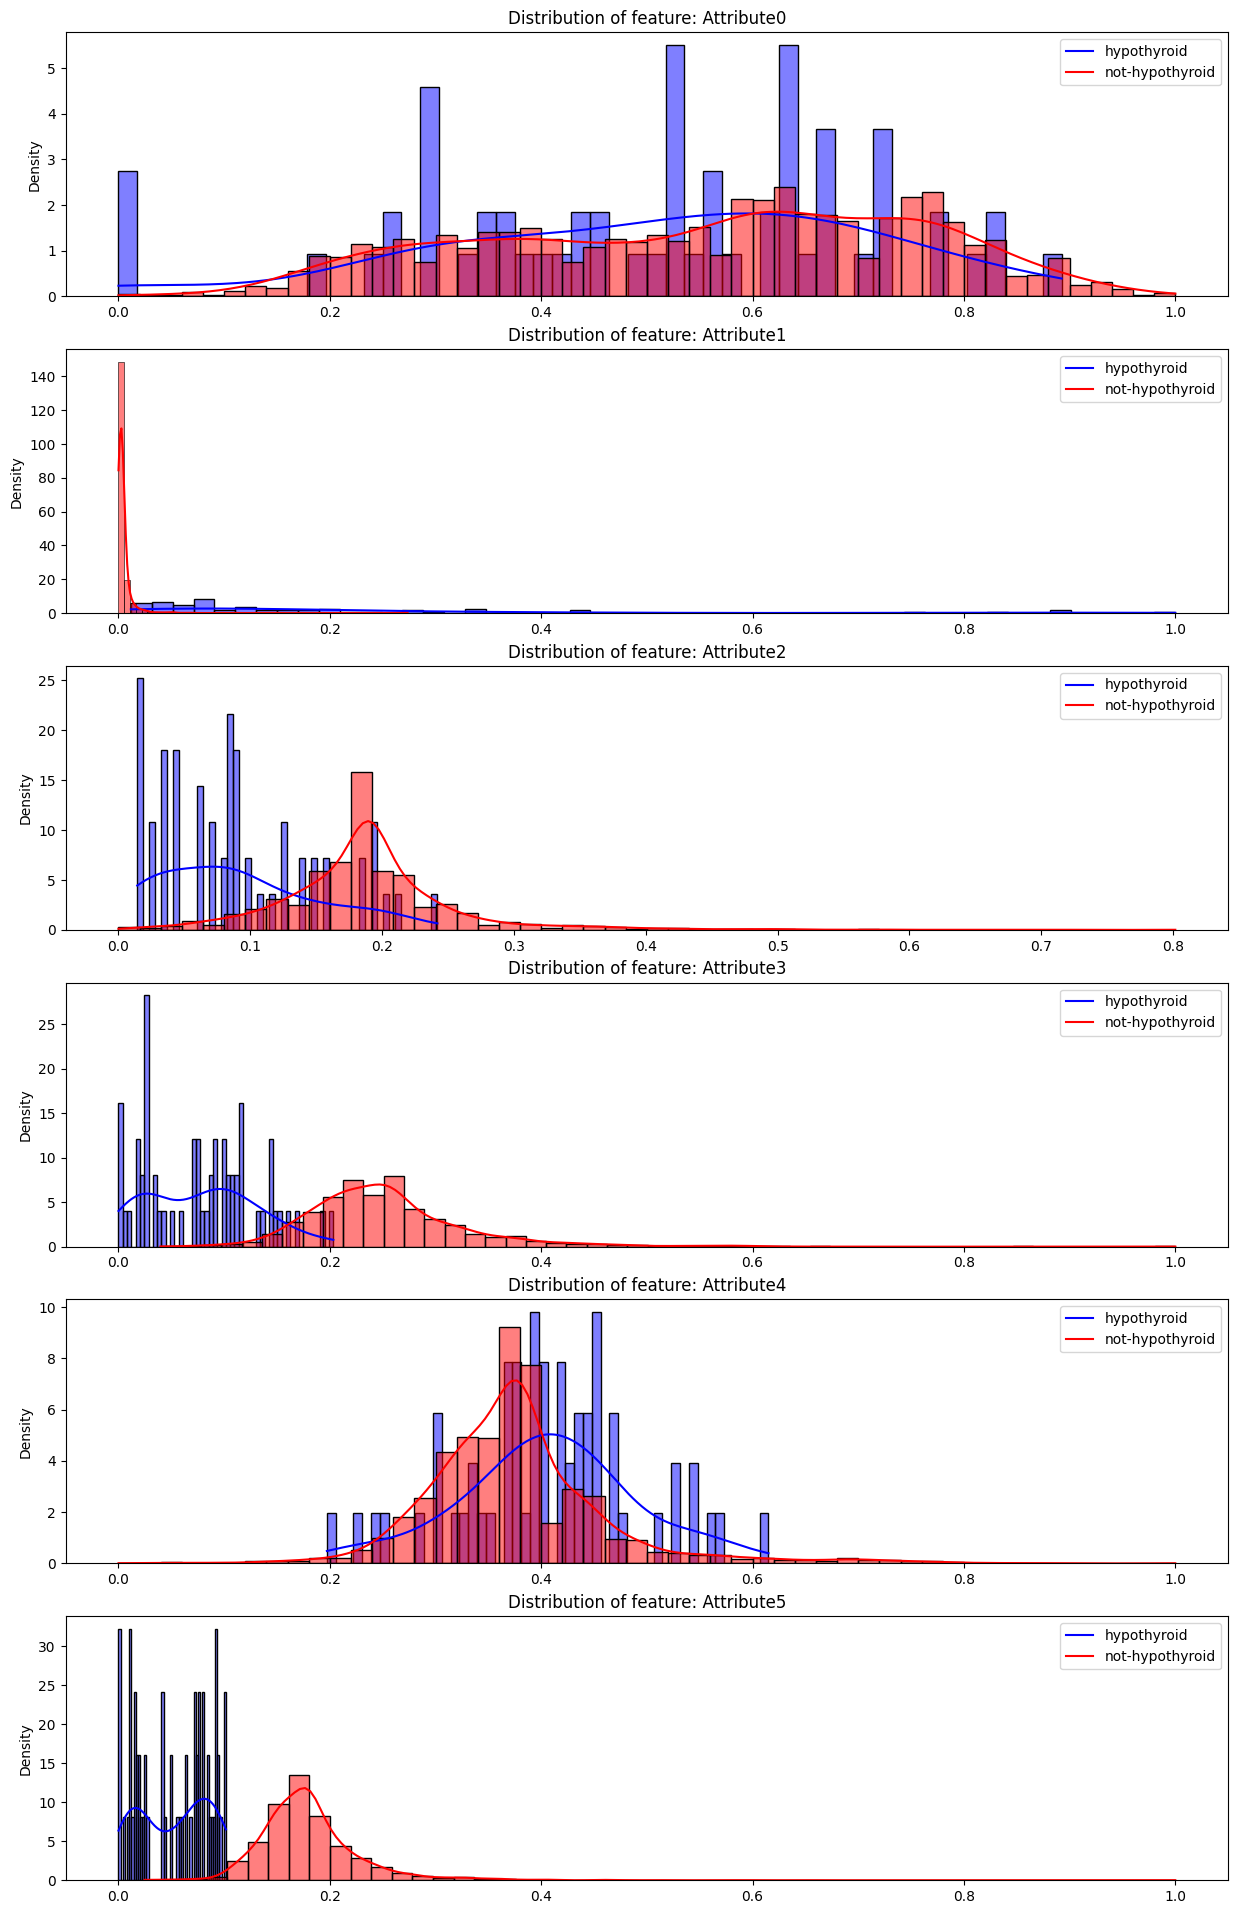

In [5]:
import matplotlib.gridspec as gridspec
features=list(df.columns[:-1])
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['hypothyroid', 'not-hypothyroid'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

In [6]:
print(f"By observing the PDF of a attribute, we can directly tell whether or not it's normally distributed. \nIf it's following a normal distribution (Gaussian Model), then we can immediately tell which value of THIS \nattribute should be consider an anomaly. For example, for attribute5, any value greater than 0.3 should be considerd an anomaly. \n\n ")

By observing the PDF of a attribute, we can directly tell whether or not it's normally distributed. 
If it's following a normal distribution (Gaussian Model), then we can immediately tell which value of THIS 
attribute should be consider an anomaly. For example, for attribute5, any value greater than 0.3 should be considerd an anomaly. 

 


In [7]:
# Helper Functions. 
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
def calculate_auc_score(X_train, X_validation, Y_trian, Y_valiadation, gmm_train, n):
    # This function will return a tuple T where
    #           T[0] -> (train_AUC_score, validation_AUC_score)
    #           T[1] -> (train_log_prob, validation_log_prob)

    if(type(X_train) != pandas.core.frame.DataFrame):
        X_train = pandas.DataFrame(X_train)
    if(type(X_validation) != pandas.core.frame.DataFrame):
        X_validation = pandas.DataFrame(X_validation)
    if(type(Y_trian) != pandas.core.frame.DataFrame):
        Y_trian = pandas.DataFrame(Y_trian)
    if(type(Y_valiadation) != pandas.core.frame.DataFrame):
        Y_valiadation = pandas.DataFrame(Y_valiadation)
    if(type(gmm_train) != pandas.core.frame.DataFrame):
        gmm_train = pandas.DataFrame(gmm_train)    
    
    # We assume X_train and X_validation have the SAME columns. 
    
    # if X_train.columns != X_validation.columns:
    #     print(f"DIFFERENT columns lists.\n\n")
    #     return 
    
    gmm = GaussianMixture(n_components = n)
    gmm.fit(gmm_train)
    train_log_prob = gmm.score_samples(X_train)
    validation_log_prob = gmm.score_samples(X_validation)
    train_AUC_score = roc_auc_score(Y_trian, train_log_prob * -1)
    validation_AUC_score = roc_auc_score(Y_valiadation, validation_log_prob * -1)
    return ((train_AUC_score, validation_AUC_score), (train_log_prob, validation_log_prob)) 

def calculate_threshold(log_prob, y, range):
    # This function will return the F1 score based on the given probabilities and the truth table.
    # The "range" parameter determines the precision. 
    thresholds = np.linspace(np.min(log_prob), np.max(log_prob), range)
    best_f1 = 0 
    best_thresh_hold = 0 
    for i in thresholds: 
        prediction = (log_prob < i).astype(int)
        f1 = f1_score(y, prediction)
        if(f1 > best_f1):
            best_f1 = f1
            best_thresh_hold = i
    return (best_f1, best_thresh_hold)

def draw_outliers(first_feature_index, second_feature_index, X_train, y_train, X_validation, y_validation):
    # This function will 
    # 0. plot the given two features. 
    # 1. Waiting for input for the n_components. 
    # 2. Fit a normal distribution based on the input n_component value. 
    # 3. Calculate and output the train_auc score and validation_auc score. 
    # 4. Calculate the threshold. 
    # 5. Based on the calculated threshold, draw another graph with circles around outliers. 
    train_auc_score = 0
    validation_auc_score = 0
    features = [X_train.columns[first_feature_index], X_train.columns[second_feature_index]]
    plt.scatter(X_train[features[0]][y_train == 0.00], X_train[features[1]][y_train == 0.00], c = "b")
    plt.scatter(X_train[features[0]][y_train == 1.00], X_train[features[1]][y_train == 1.00], c = "r")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()
    n = int(input("Please input your n_component value: "))
    columns = [X_train.columns[first_feature_index], X_train.columns[second_feature_index]]
    result = calculate_auc_score(X_train[[columns[0], columns[1]]], X_validation[[columns[0], columns[1]]], y_train, y_validation, X_train[[columns[0], columns[1]]], n)
    train_log_prob = result[1][0]
    validation_log_prob = result[1][1]
    train_auc_score = result[0][0]
    validation_auc_score = result[0][1]
    best_F1, threshold = calculate_threshold(validation_log_prob, y_validation, 500)
    print(f"Based on attribute{first_feature_index} and attribute{second_feature_index}:\n\n\tTrain_AUC_Score = {train_auc_score}\n\tVal_AUC_Score = {validation_auc_score}\n\tBest_F1_Score = {best_F1}\n\tthreshold is {threshold}\n")
    plt.scatter(X_train[features[0]][y_train == 0.00], X_train[features[1]][y_train == 0.00], c = "b")
    plt.scatter(X_train[features[0]][y_train == 1.00], X_train[features[1]][y_train == 1.00], c = "r")
    outliers = train_log_prob < threshold
    ax = plt.gca()
    for i in range(X_train.shape[0]):
        if(outliers[i]):
            circle = plt.Circle((X_train.iloc[i, first_feature_index], X_train.iloc[i, second_feature_index]), 0.03, color = "green", fill = False)
            ax.add_patch(circle)
    plt.show()  

def calculate_c_value(feature_index_list, n0, n1, X_train, y_train, X_validation, y_validation):
    # This function will
    # 0. Fit a normal distribution G1 on training data points whose target value is FALSE for the given feature. 
    # 1. Fit a normal distribution G2 on training data points whose target value is TRUE for the given feature. . 
    # 2. Compute score sample for both G1 G2 on the validation set. 
    # 3. Return the best C value such that for ANY data point, if S1 < C * S2 it's classified as hypothyroid and such a C has the BEST F1 score on the validation data set.
    column = []
    for i in feature_index_list:
        column.append(X_train.columns[i])
    gmm_0 = GaussianMixture(n_components = n0)
    gmm_1 = GaussianMixture(n_components = n1)
    gmm_0.fit(pandas.DataFrame(X_train[column][y_train == 0.00])) # Negative Data Points. 
    gmm_1.fit(pandas.DataFrame(X_train[column][y_train == 1.00])) # Positive Data Points. 

    best_C_train = 0.00
    best_C_val = 0.00
    best_F1_train = 0.00
    best_F1_val = 0.00

    S0 = gmm_0.score_samples(pandas.DataFrame(X_validation[column]))
    S1= gmm_1.score_samples(pandas.DataFrame(X_validation[column]))
    for C in np.arange(0.1, 10.1, 0.1):
        prediction = (S0 < C * S1).astype(int)
        current_F1 = f1_score(y_validation, prediction)
        if(current_F1 > best_F1_val):
            best_F1_val = current_F1
            best_C_val = C
    
    S0 = gmm_0.score_samples(pandas.DataFrame(X_train[column]))
    S1= gmm_1.score_samples(pandas.DataFrame(X_train[column]))
    for C in np.arange(0.1, 10.1, 0.1):
        prediction = (S0 < C * S1).astype(int)
        current_F1 = f1_score(y_train, prediction)
        if(current_F1 > best_F1_train):
            best_F1_train = current_F1
            best_C_train = C

    print(f"With attribute{feature_index_list}, the best_C_val is {best_C_val} and the best_C_train is {best_C_train} and the best F1_val is {best_F1_val} and the best F1_train is {best_F1_train}.\n")
    return (feature_index_list, best_C_val, best_F1_val, best_C_train, best_F1_train)

# I don't want to mess up with the oringinal calculate_c_value() function so I will simply make a new version here so I can use it for part 6.  
def calculate_c_value_on_test(feature_index_list, n0, n1, X_train, y_train, X_test, y_test):
    # This function will
    # 0. Fit a normal distribution G1 on training data points whose target value is FALSE for the given feature. 
    # 1. Fit a normal distribution G2 on training data points whose target value is TRUE for the given feature. . 
    # 2. Compute score sample for both G1 G2 on the validation set. 
    # 3. Return the best C value such that for ANY data point, if S1 < C * S2 it's classified as hypothyroid and such a C has the BEST F1 score on the validation data set.
    column = []
    for i in feature_index_list:
        column.append(X_train.columns[i])
    gmm_0 = GaussianMixture(n_components = n0)
    gmm_1 = GaussianMixture(n_components = n1)
    gmm_0.fit(pandas.DataFrame(X_train[column][y_train == 0.00])) # Negative Data Points. 
    gmm_1.fit(pandas.DataFrame(X_train[column][y_train == 1.00])) # Positive Data Points. 

    best_C_test = 0.00
    best_F1_test = 0.00
    best_recall_test = 0.00
    best_precision_test = 0.00

    S0 = gmm_0.score_samples(pandas.DataFrame(X_test[column]))
    S1= gmm_1.score_samples(pandas.DataFrame(X_test[column]))
    for C in np.arange(0.1, 10.1, 0.1):
        prediction = (S0 < C * S1).astype(int)
        current_F1 = f1_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        recall = recall_score(y_test, prediction)
        if(current_F1 > best_F1_val):
            best_F1_test = current_F1
            best_C_test = C
            best_recall_test = recall
            best_precision_test = precision


    print(f"With attribute{feature_index_list}, the best_C_test is {best_C_test} and the best_F1_test is {best_F1_test} and recall is {best_recall_test} and precision is {best_precision_test}\n")
    return (feature_index_list, best_C_test, best_F1_test, best_recall_test, best_precision_test)

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish hypothyroid patients from not-hypothyroid patients based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that patient as hypothyroid. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-hypothyroid patients** (instead of all the patients).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [8]:
line = "\n----------------------------------------------------------------------------------------"
auc_train = []
auc_validation = []
validation_log_prob = []
for i in X_train.columns:
    feature_trian = X_train[i] 
    feature_validation = X_val[i]

    result = calculate_auc_score(feature_trian, feature_validation, y_train, y_val, feature_trian, 1)

    auc_train.append(result[0][0])
    auc_validation.append(result[0][1])
    validation_log_prob.append(result[1][1])
auc_table = pandas.DataFrame({"Feature": X_train.columns, "AUC_TRAIN": auc_train, "AUC_VALIDATION": auc_validation})
print(auc_table, line)
sorted_auc_validation = sorted(auc_validation, reverse = True)[:3]
best_three = []
for i in range(3):
    best_three.append(auc_validation.index(sorted_auc_validation[i]))
print(f"The best three attributes are attribute {best_three[0]} and attribute {best_three[1]} and attribute {best_three[2]}", line)
thresholds = []
f1_scores = []
for i in best_three:
    result = calculate_threshold(validation_log_prob[i], y_val, 100)
    thresholds.append(result[1])
    f1_scores.append(result[0])
print("For my calculate_threshold() function, it takes O(n) time where n is the total number of data points of the validation set.", line)
final_table = pandas.DataFrame({"Feature": [X_train.columns[best_three[0]], X_train.columns[best_three[1]], X_train.columns[best_three[2]]], \
                                "AUC_VALIDATION": [auc_validation[best_three[0]], auc_validation[best_three[1]], auc_validation[best_three[2]]], "F1": f1_scores, "Thresholds": thresholds})
print("The final table when fitting on ALL data points is \n\n", final_table, line) 

non_hypothyroid_train_X = X_train[y_train == 0.00]
non_hypothyroid_validation_X = X_val[y_val == 0.00]
non_hypothyroid_train_y = y_train[y_train == 0.00]
non_hypothyroid_validation_y = y_val[y_val == 0.00]
auc_validation = []
validation_log_prob = []
thresholds = []
f1_scores = []
for i in best_three: 
    column = X_train.columns[i]
    result = calculate_auc_score(X_train[column], X_val[column], y_train, y_val, non_hypothyroid_train_X[column], 1)
    auc_validation.append(result[0][1])
    validation_log_prob.append(result[1][1])
for i in range(3):
    result = calculate_threshold(validation_log_prob[i], y_val, 100)
    thresholds.append(result[1])
    f1_scores.append(result[0])
final_table = pandas.DataFrame()
final_table["Feature"] = [X_train.columns[best_three[0]], X_train.columns[best_three[1]], X_train.columns[best_three[2]]]
final_table["AUC_VALIDATION"] = [auc_validation[0], auc_validation[1], auc_validation[2]]
final_table["F1"] = f1_scores
final_table["Thresholds"] = thresholds
print("The final table when fitting on ONLY non-hypothyroid data points is \n\n", final_table, line) 
print("The results are very very similar since we have an imbanlanced data set where non-hypothyroid data points are the\nmajorty meaning that it will NOT make a big difference whether or not we train on the complete data set or ONLY non-hypothryroid data points.", line)
    



      Feature  AUC_TRAIN  AUC_VALIDATION
0  Attribute0   0.456077        0.494256
1  Attribute1   0.950651        0.975956
2  Attribute2   0.805685        0.829016
3  Attribute3   0.940328        0.956407
4  Attribute4   0.577292        0.614478
5  Attribute5   0.967175        0.966627 
----------------------------------------------------------------------------------------
The best three attributes are attribute 1 and attribute 5 and attribute 3 
----------------------------------------------------------------------------------------
For my calculate_threshold() function, it takes O(n) time where n is the total number of data points of the validation set. 
----------------------------------------------------------------------------------------
The final table when fitting on ALL data points is 

       Feature  AUC_VALIDATION        F1  Thresholds
0  Attribute1        0.975956  0.714286    0.268509
1  Attribute5        0.966627  0.506329   -0.083015
2  Attribute3        0.956407  0.46

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components of the GM model.

  a. 2D plot:
 1. Pick two features (say, Attribute1 and Attribute2).
 2. Scatter plot (plt.scatter) those features on a figure (Attribute1 on the x-axis and Attribute2 on the y-axis).
 3. Color the data points based on their class (not-hypothyroid blue and hypothyroid red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on not-hypothyroid patients). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





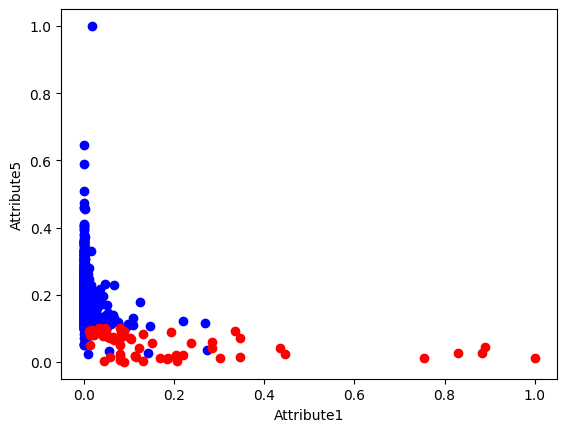

Based on attribute1 and attribute5:

	Train_AUC_Score = 0.9857868407503225
	Val_AUC_Score = 0.9860566448801742
	Best_F1_Score = 0.7012987012987013
	threshold is -0.213583410235195



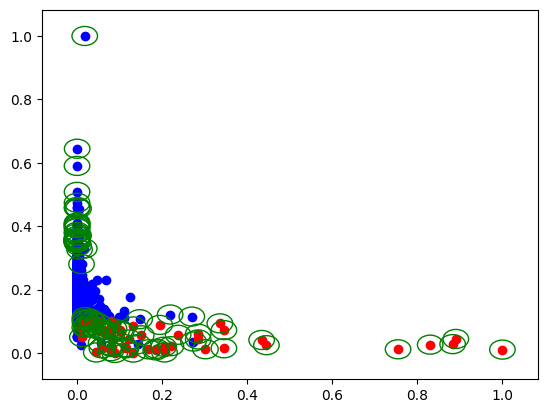

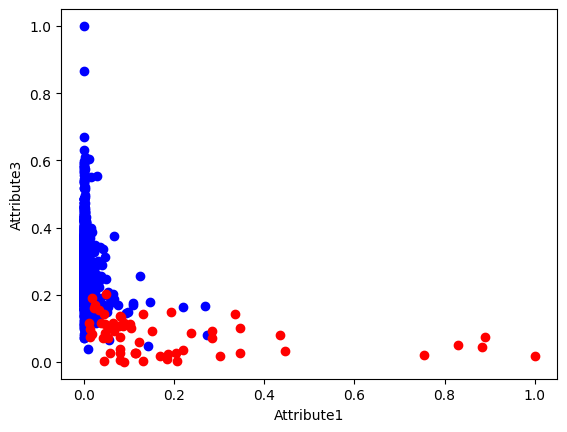

Based on attribute1 and attribute3:

	Train_AUC_Score = 0.9578309040866011
	Val_AUC_Score = 0.9700138641315111
	Best_F1_Score = 0.5614035087719298
	threshold is -0.8293042581192083



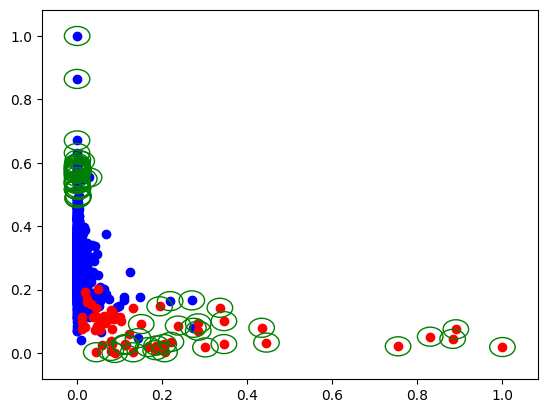

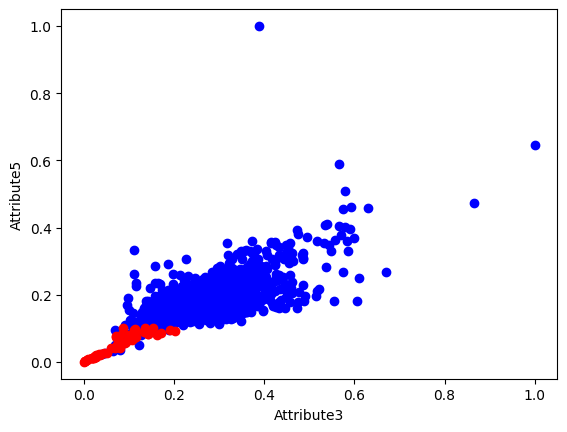

Based on attribute3 and attribute5:

	Train_AUC_Score = 0.9346932029824752
	Val_AUC_Score = 0.9433353139235493
	Best_F1_Score = 0.5245901639344263
	threshold is -0.35948966384764347



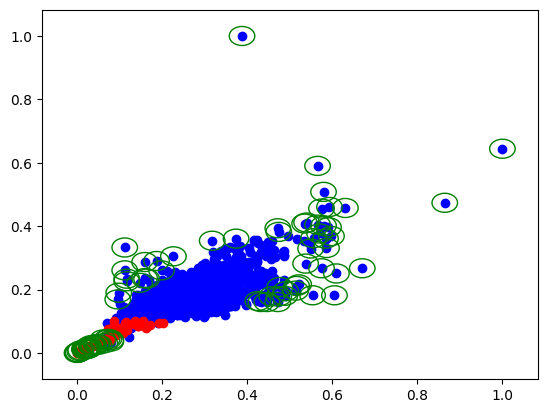

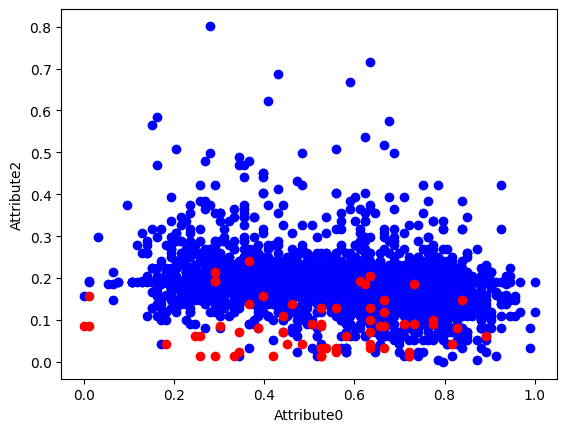

Based on attribute0 and attribute2:

	Train_AUC_Score = 0.7521786942454504
	Val_AUC_Score = 0.7791245791245791
	Best_F1_Score = 0.22413793103448276
	threshold is 0.3080576176424472



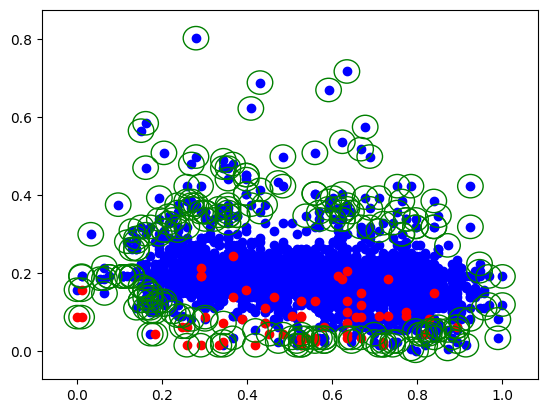

For graphs above, I picked n = [2, 2, 1, 2] by focusing on the NON-HYPOTHYROID. Basically, if the red dots are centered more than one location, I pick a higher n value accordingly.



In [9]:
draw_outliers(1, 5, X_train, y_train, X_val, y_val)
draw_outliers(1, 3, X_train, y_train, X_val, y_val)
draw_outliers(3, 5, X_train, y_train, X_val, y_val)
draw_outliers(0, 2, X_train, y_train, X_val, y_val)
# WARNING: Function draw_outliers() will be blocked waiting for user input -> The value of n_component. 
print(f"For graphs above, I picked n = {[2, 2, 1, 2]} by focusing on the NON-HYPOTHYROID. Basically, if the red dots are centered more than one location, I pick a higher n value accordingly.\n")

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for hypothyroid and not-hypothyroid patients.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the patient is classified as hypothyroid. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the patient is hypothyroid (the patient belongs to the $G_2$ distribution which represents hypothyroid patients). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [10]:
report = []
F1_scores = []
for i in range(6):
    result = calculate_c_value([i], 1, 1, X_train, y_train, X_val, y_val)
    report.append(result)
    F1_scores.append(result[2])
sorted_F1_scores = sorted(F1_scores, reverse = True)
Largest_F1 = sorted_F1_scores[0]
print(f"The best F1_score I got is {sorted_F1_scores[0]} with attribute{F1_scores.index(sorted_F1_scores[0])} and best_C is {report[F1_scores.index(sorted_F1_scores[0])][1]}.\n")

With attribute[0], the best_C_val is 4.3 and the best_C_train is 1.0 and the best F1_val is 0.05714285714285714 and the best F1_train is 0.05333333333333334.

With attribute[1], the best_C_val is 0.1 and the best_C_train is 0.1 and the best F1_val is 0.7868852459016393 and the best F1_train is 0.7019867549668874.

With attribute[2], the best_C_val is 0.4 and the best_C_train is 0.4 and the best F1_val is 0.3956043956043956 and the best F1_train is 0.29850746268656714.

With attribute[3], the best_C_val is 0.2 and the best_C_train is 0.2 and the best F1_val is 0.7419354838709677 and the best F1_train is 0.6369426751592356.

With attribute[4], the best_C_val is 0.8 and the best_C_train is 0.9 and the best F1_val is 0.0979020979020979 and the best F1_train is 0.08643815201192251.

With attribute[5], the best_C_val is 0.30000000000000004 and the best_C_train is 0.4 and the best F1_val is 0.8148148148148148 and the best F1_train is 0.8028169014084507.

The best F1_score I got is 0.814814814

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-hypothyroid patients or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the not-hypothyroid patient, and multiple components for hypothyroid ones! Why does it make sense to have multiple components for hypothyroid patients?

In [11]:
line = "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"
report = pandas.DataFrame(columns = ["Feature Index(s)", "Number of gaussians model", "n_component", "train_auc", "val_auc", "best_F1_train", "best_F1_val", "best_C_train", "best_C_val"])
# report.loc[len(report)] = {"Feature Index": (2,2), "Number of gaussians model":12, "n_component":12, "train_auc":21, "val_auc":12, "trian_F1":21, "val_F1":21}

# I will first fit 6 (SINGLE variable SINGLE component) normal distributions. From Attribute_0 to Attribute_1.   
for i in range(6):
    column = X_train.columns[i]
    result_0 = calculate_auc_score(X_train[column], X_val[column], y_train, y_val, X_train[column], 1)
    result_1 = calculate_threshold(result_0[1][0], y_train, 500)
    result_2 = calculate_threshold(result_0[1][1], y_val, 500)
    train_auc = result_0[0][0]
    val_auc = result_0[0][1]
    train_F1 = result_1[0]
    val_F1 = result_2[0]
    new_row = {"Feature Index(s)": i, "Number of gaussians model": 1, "n_component": 1, "train_auc": train_auc, "val_auc": val_auc, "best_F1_train": train_F1, "best_F1_val": val_F1, "best_C_train": "None", "best_C_val": "None"}
    report.loc[len(report)] = new_row

# I then try a different approach based on the hint -> A two normal distributions 
# The first normal distrition is for non-hypothyroid and it should be with a single component. 
# The second normal distribution is for hypothyroid and it should be multiple components. 
# I first try attribute 1, 3, 5 which should be the best combination to distinguish the patients. 

result = calculate_c_value([1,3,5], 1, 3, X_train, y_train, X_val, y_val)
best_C_val = result[1]
best_C_train = result[3]
best_F1_val = result[2]
best_F1_train = result[4]
new_row = {"Feature Index(s)": (1, 3, 5), "Number of gaussians model": 2, "n_component": (1, 3), "train_auc": "None", "val_auc": "None", "best_F1_train": best_F1_train, "best_F1_val": best_F1_val, "best_C_train": best_C_train, "best_C_val": best_C_val}
report.loc[len(report)] = new_row
print(line)


result = calculate_c_value([1, 2, 3, 4, 5], 1, 3, X_train, y_train, X_val, y_val)
best_C_val = result[1]
best_C_train = result[3]
best_F1_val = result[2]
best_F1_train = result[4]
new_row = {"Feature Index(s)": (1, 2, 3, 4, 5), "Number of gaussians model": 2, "n_component": (1, 3), "train_auc": "None", "val_auc": "None", "best_F1_train": best_F1_train, "best_F1_val": best_F1_val, "best_C_train": best_C_train, "best_C_val": best_C_val}
report.loc[len(report)] = new_row
print(line)


result = calculate_c_value([2, 4, 5], 1, 1, X_train, y_train, X_val, y_val)
best_C_val = result[1]
best_C_train = result[3]
best_F1_val = result[2]
best_F1_train = result[4]
new_row = {"Feature Index(s)": (2, 4, 5), "Number of gaussians model": 2, "n_component": (1, 1), "train_auc": "None", "val_auc": "None", "best_F1_train": best_F1_train, "best_F1_val": best_F1_val, "best_C_train": best_C_train, "best_C_val": best_C_val}
report.loc[len(report)] = new_row
print(line)


result = calculate_c_value([0,1,2], 1, 3, X_train, y_train, X_val, y_val)
best_C_val = result[1]
best_C_train = result[3]
best_F1_val = result[2]
best_F1_train = result[4]
new_row = {"Feature Index(s)": (0, 1, 2), "Number of gaussians model": 2, "n_component": (1, 3), "train_auc": "None", "val_auc": "None", "best_F1_train": best_F1_train, "best_F1_val": best_F1_val, "best_C_train": best_C_train, "best_C_val": best_C_val}
report.loc[len(report)] = new_row
print(line)
pandas.set_option('display.expand_frame_repr', False)
print(report, "\n")
print(line)
print("It makes sense to have multiple components on the HYPOTHYROID patients because hypothyroidism can manifest in different subtypes and patient groups, each with distinct distributions \nof symptoms, lab results, or other clinical features. \n")
print(line)
print("As we can see, the best F1 score (around 91%) occurs when we apply a two gaussion model, mutiple features(Attribute 1, 2, 3, 4, 5) with a SINGLE component on the non-hypothyroid patients and MUTIPLE\ncomponents(3) on the hypothyroid patients. \n  ")


With attribute[1, 3, 5], the best_C_val is 0.6 and the best_C_train is 0.2 and the best F1_val is 0.8620689655172413 and the best F1_train is 0.7878787878787878.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
With attribute[1, 2, 3, 4, 5], the best_C_val is 0.7000000000000001 and the best_C_train is 0.4 and the best F1_val is 0.9090909090909091 and the best F1_train is 0.8396946564885496.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
With attribute[2, 4, 5], the best_C_val is 0.7000000000000001 and the best_C_train is 0.8 and the best F1_val is 0.9056603773584906 and the best F1_train is 0.8.

----------------------------------------------------------------------------------------------------------------------------------------

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [12]:
# When I apply a two gaussion model with ALL features, SINGLE component on the non-hypothyroid patients and MUTIPLE components on the hypothyroid patients, the model performed the best. 
result = calculate_c_value_on_test([1, 2, 3, 4, 5], 1, 3, X_train, y_train, X_test, y_test)
print(f"F1_test: {result[2]}\nPrecision: {result[4]}\nRecall: {result[3]}\n")


With attribute[1, 2, 3, 4, 5], the best_C_test is 0.7000000000000001 and the best_F1_test is 0.8333333333333334 and recall is 1.0 and precision is 0.7142857142857143

F1_test: 0.8333333333333334
Precision: 0.7142857142857143
Recall: 1.0



## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


The Gaussian distribution is not always the most appropriate choice, especially for medical data like hypothyroidism metrics, which may be non-symmetric, skewed, or multimodal. Thus, exploring other distributions can improve model accuracy and provide more meaningful insights. After researching, there are multiple other distribution that can be used to model the data. 

For example:

Exponential Distribution which is useful for modeling time-to-event data, such as the time until symptom onset in chronic diseases. Common in survival analysis and widely used in medical fields to model lifespans and durations.

Gamma Distribution known for modeling skewed data in various domains, especially where Gaussian assumptions don’t hold. Frequently used in biology and medicine for variables like enzyme activity or hormone levels, which are often right-skewed.

Beta Distribution well-regarded for bounded data in fields like finance and health, it can normalized lab test results, such as thyroid-stimulating hormone (TSH) levels, especially when scaled to a 0-1 range. 

For our data

Exploratory Data Analysis (EDA): Starts with visualizations such as histograms, Q-Q plots, and KDE plots to observe data distribution characteristics like skewness and modality.

Statistical Goodness-of-Fit Tests: Tests like the Anderson-Darling or Kolmogorov-Smirnov can assess how well a distribution fits the data.

Model Selection Criteria: Use metrics like the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to compare and select the best-fitting model among candidates.





References: 

https://statisticsbyjim.com/probability/exponential-distribution/

https://statisticsbyjim.com/probability/gamma-distribution/

https://statisticsbyjim.com/probability/beta-distribution/

Also involves Chatgpt